<a href="https://colab.research.google.com/github/efratmag/Deep_Learning_YDATA/blob/main/%5BDL%5D_HW2_Theory_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dana Rozenblum & Efrat Magidov
# Deep Learning Theoretical Aspects - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


##### Write your answer here
With linear activation functions, no matter how many layers in the neural network, the last layer will be a linear function of the first layer (because a linear combination of linear functions is still a linear function). So a linear activation function turns the neural network into just one layer.

$z_1=w_1x+b_1$

$z_2=w_2z_1+b_2$

$z_2=w_2*(w_1x+b_1)+b_2$

$z_2=(w_2w_1)x + (w_2b_1 + b_2)$

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1. Sigmoid
$$f(t)=\dfrac{1}{1+e^{-t}}$$

$f(t) = g(u)* u(t)$

$g(u) = \dfrac{1}{u}$

$u(t) = 1+ e^{-t}$

$\frac{\partial g}{\partial u} = \dfrac{-1}{u^2}$

$\frac{\partial u}{\partial t} = -e^{-t}$

$\frac{\partial f}{\partial t} = \dfrac{e^{-t}}{(1+ e^{-t})^2} = 
\dfrac{1}{(1+ e^{-t})}*\dfrac{(1+e^{-t})-1}{(1+ e^{-t})} 
=f(t)*(1-f(t))
$

In [2]:
# Write your answer here

def sigmoidDerivative(t):
    f = 1/(1 + np.exp(-t))
    df = f * (1 - f)
    return df

t = 0.5
print(f"Checking, Sigmoid derivative when t={t} is {sigmoidDerivative(t)}")

Checking, Sigmoid derivative when t=0.5 is 0.2350037122015945


2. ReLU

$$f(x)=max(x,0)$$


$
  \frac{\partial f}{\partial t} = \left.
  \begin{cases}
    0, & \text{if } x<0 \\
    1, & \text{if } x\geq0
  \end{cases}
  \right\} 
$

In [3]:
# Write your answer here

def reluDerivative(x):

    if x > 0:
        return 1
    
    else:
        return 0

x = 0.5
print(f"Checking, Relu derivative when x={x} is {reluDerivative(x)}")

Checking, Relu derivative when x=0.5 is 1


3. Softmax
$$\sigma(\mathbf{z})_j=\dfrac{e^{z_j}}{\sum^K_{k=1}e^{z_k}}$$

$\sigma(z_j) = \frac{f(z)}{h(z)}$

$\frac{\partial f}{\partial z} = e^{z_j}$

$\frac{\partial h}{\partial z} = e^{z_K}$

$\frac{\partial \sigma}{\partial z} = \frac{f'(z)*h(z) - h'(z)*f(z)}{h^2(z)} = \frac{e^{z_j}*\sum^K_{k=1}e^{z_k} - e^{z_K}*e^{z_j}}{(\sum^K_{k=1}e^{z_k})^2} = \dfrac{e^{z_j}}{\sum^K_{k=1}e^{z_k}}(1-\dfrac{e^{z_K}}{\sum^K_{k=1}e^{z_k}}) = \sigma(z_j)*(1-\sigma(z_K))$




In [4]:
def softmaxDerivative(Z):

    jacobian_m = np.diag(Z)

    for i in range(len(jacobian_m)):
        
        for j in range(len(jacobian_m)):
            
            if i == j:
                jacobian_m[i][j] = Z[i] * (1-Z[i])

            else: 
                jacobian_m[i][j] = -Z[i]*Z[j]
                
    return jacobian_m

Z = np.array([0.2,0.6,0.2])
print(f"Checking, Softmax derivative when Z={Z} is:")
print(softmaxDerivative(Z))

Checking, Softmax derivative when Z=[0.2 0.6 0.2] is:
[[ 0.16 -0.12 -0.04]
 [-0.12  0.24 -0.12]
 [-0.04 -0.12  0.16]]


### Back Propagation
Use the delta rule and backprop to compute the partial derivatives $\frac{\partial z}{\partial x_1}$, $\frac{\partial z}{\partial x_2}$, $\frac{\partial z}{\partial x_3}$ for these computations:

$$z=x_1+5x_2-3x_3^2$$

$\frac{\partial z}{\partial x_1} = 1$

 $\frac{\partial z}{\partial x_2} = 5$ 
 
 $\frac{\partial z}{\partial x_3} = -6x_3$

In [5]:
def derivative1(x1, x2, x3):
    
    # forward pass 
    x2_5 = 5 * x2          #(1)
    px3 = x3 ** 2          #(2)
    px3_3 = 3 * px3        #(3)
    f = x1 + x2_5 - px3_3  #(4)
                   
    # backprop f = x1 + x2_5 - px3_3
    dx1 = 1                #(4)
    dx2_5 = 1              #(4)
    dpx3_3 = -1            #(4)
    
    # backprop px3_3 = 3 * px3
    dpx3 = 3 * dpx3_3      #(3)
    
    # backprop px3 = x3 ** 2
    dx3 = 2 * x3 * dpx3    #(2)
    
    # backprop x2_5 = 5 * x2
    dx2 = 5 * dx2_5       #(1)
    
    return dx1, dx2, dx3
    
x1 = 1
x2 = 2
x3 = 3
print(f"Checking, derivatives when x1={x1}, x2={x2}, x3={x3} are: {derivative1(x1, x2, x3)}")

Checking, derivatives when x1=1, x2=2, x3=3 are: (1, 5, -18)


$$z=x_1(x_2-4)+\dfrac{e^{x_3^2}}{5x_4^2}$$

$\frac{\partial z}{\partial x_1} = x_2 -4$

 $\frac{\partial z}{\partial x_2} = x_1$ 
 
 $\frac{\partial z}{\partial x_3} = \frac{2x_3e^{x_3^2}}{5x_4^{2}}$

$\frac{\partial z}{\partial x_4} = -\frac{2e^{x_3^2}}{5x_4^{3}}$

In [6]:
def derivative2(x1, x2, x3, x4):
    
    # forward pass
    x2_4 = x2 - 4                                  #(1)
    first = x1 * x2_4                              #(2)
    px3 = x3 ** 2                                  #(3)
    numer = np.exp(px3)                            #(4)
    px4 = x4 ** 2                                  #(5)
    denom = 5 * px4                                #(6)
    second = numer / denom                         #(7)
    f = first + second                             #(8)
    
    # backprop f = first + second
    dfirst = 1                                     #(8)
    dsecond = 1                                    #(8)
    
    # backprop second = numer / denom
    dnumer = (1 / denom) * dsecond                 #(7)
    ddenom = -1 * numer * dsecond * (denom ** -2)  #(7)
    
    # backprop denom = 5 * px4
    dpx4 = 5 * ddenom                              #(6)
    
    # backprop px4 = x4 ** 2
    dx4 = 2 * x4 * dpx4                            #(5)
    
    # backprop numer = np.exp(px3)
    dpx3 = np.exp(px3) * dnumer                    #(4)
    
    # backprop px3 = x3 ** 2
    dx3 = 2 * x3 * dpx3                            #(3)
    
    # backprop first = x1 * x2_4
    dx1 = x2_4 * dfirst                            #(2)
    dx2_4 = x1 * dfirst                            #(2)
    
    # backprop x2_4 = x2 - 4
    dx2 = 1 * dx2_4                                #(1)
    
    return dx1, dx2, dx3, dx4
    
x1 = 1
x2 = 2
x3 = 3
x4 = 4
print(f"Checking, derivatives when x1={x1}, x2={x2}, x3={x3}, x4={x4} are: {derivative2(x1, x2, x3, x4)}")

Checking, derivatives when x1=1, x2=2, x3=3, x4=4 are: (-2, 1, 607.7312945681539, -50.64427454734616)


$$z=\dfrac{1}{x_3}+e^{(x_1+5(x_2+3))^2}$$

$\frac{\partial z}{\partial x_1} = 2\left(x_1+5\left(x_2+3\right)\right)e^{\left(x_1+5\left(x_2+3\right)\right)^2}$

$\frac{\partial z}{\partial x_2} = 10\left(x_1+5\left(x_2+3\right)\right)e^{\left(x_1+5\left(x_2+3\right)\right)^2}$ 
 
$\frac{\partial z}{\partial x_3} = \frac{-1}{x_3^{2}}$

In [7]:
def derivative3(x1, x2, x3):
    
    # forward pass
    first = 1 / x3                       #(1)
    x2_3 = x2 + 3                        #(2)
    x2_3_5 = 5 * x2_3                    #(3)
    inner = x1 + x2_3_5                  #(4)
    p_inner = inner ** 2                 #(5)
    second = np.exp(p_inner)             #(6)
    f = first + second                   #(7)
    
    # backprop f = first + decond
    dfirst = 1                           #(7)
    dsecond = 1                          #(7)
    
    # backprop second = np.exp(p_inner)
    dp_inner = np.exp(p_inner) * dsecond #(6)
    
    # backprop p_inner = inner ** 2
    dinner = 2 * inner * dp_inner        #(5)
    
    # backprop inner = x1 + x2_3_5
    dx1 = 1 * dinner                     #(4)
    dx2_3_5 = 1 * dinner                 #(4)
    
    # backprop x2_3_5 = 5 * x2_3
    dx2_3 = 5 * dx2_3_5                  #(3)
    
    # backprop x2_3 = x2 + 3
    dx2 = 1 * dx2_3                      #(2)
    
    # backprop first = 1 / x3
    dx3 = -1 * (x3 ** -2) * dfirst       #(1)
    
    return dx1, dx2, dx3

x1 = 1
x2 = 2
x3 = 3
print(f"Checking, derivatives when x1={x1}, x2={x2}, x3={x3} are: {derivative3(x1, x2, x3)}")

Checking, derivatives when x1=1, x2=2, x3=3 are: (1.9910084821875477e+295, 9.955042410937738e+295, -0.1111111111111111)


#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:

$$\dfrac{d}{d\theta}J(\theta)=\lim_{\epsilon\ \rightarrow\ 0}\dfrac{J(\theta+\epsilon)-J(\theta-\epsilon)}{2\epsilon}$$

We'll numerically approximate it using:

$$\dfrac{J(\theta+\epsilon)-J(\theta-\epsilon)}{2\epsilon}$$

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [8]:
def evaluateGradient(J, theta):
    epsilon = 1e-5 #0.0001
    result = np.zeros_like(theta)
    
    for i in range(theta.size):
        xplus = theta.copy()
        xminus = theta.copy()
        xplus[i] = xplus[i] + epsilon
        xminus[i] = xminus[i] - epsilon
        result[i] = (J(xplus) - J(xminus)) / (2 * epsilon)
    return result

def func1(x):
    return (x[0] + 5 * x[1] - 3 * (x[2] ** 2))

def func2(x):
    return (x[0]*(x[1]-4)) + (np.exp(x[2]**2) / (5*(x[3]**2)))

def func3(x):
    return 1/x[2] + np.exp((x[0]+5*(x[1]+3))**2)

x = np.array([1.0,2.0,3.0])
print(f"First function, for theta={x}")
print(f"Gradient evaluation: {evaluateGradient(func1,x)}")
print(f"Analytical calculation: {derivative1(x[0],x[1],x[2])}")
                              
x = np.array([1.0,2.0,3.0,4.0])
print(f"\nSecond function, for theta={x}")
print(f"Gradient evaluation: {evaluateGradient(func2,x)}")
print(f"Analytical calculation: {derivative2(x[0],x[1],x[2],x[3])}")

x = np.array([-2.0,-2.0,-2.0])
print(f"\nThird function, for theta={x}")
print(f"Gradient evaluation: {evaluateGradient(func3,x)}")
print(f"Analytical calculation: {derivative3(x[0],x[1],x[2])}")

First function, for theta=[1. 2. 3.]
Gradient evaluation: [  1.   5. -18.]
Analytical calculation: (1, 5, -18.0)

Second function, for theta=[1. 2. 3. 4.]
Gradient evaluation: [ -2.           1.         607.731295   -50.64427455]
Analytical calculation: (-2.0, 1.0, 607.7312945681539, -50.64427454734616)

Third function, for theta=[-2. -2. -2.]
Gradient evaluation: [ 4.86185036e+04  2.43092522e+05 -2.49999994e-01]
Analytical calculation: (48618.50356545231, 243092.51782726153, -0.25)


### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

**Answer:** We can plot the confusion matrix and see which labels have most mistakes and with what other label. Moreover, we can take the first and second classes probabilities for each images. Check if there are couples of classes that repeat and also have misclassifications between them.

### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

**k1- identity:** no transformation is made, output=input.

**k2- right shift:** shifts the image to the right.

**k3- edge detection:** : the edges of objects are being highlighted by white and the rest is black.

**k4- smoothing:** each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image.

In [9]:
import numpy as np
convs = {'k1': np.array([ [0,0 ,0], [0, 1, 0], [0, 0, 0] ]),
         'k2': np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0]]),
         'k3': np.array([ [-1,-1, -1], [-1, 8, -1], [-1, -1, -1]]),
         'k4': np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9}


#### Apply to arrays
Apply the convolutions above to the following array:


In [10]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

In [11]:
# with scipy eith zero padding 
from scipy import ndimage
for k,conv_mat in convs.items(): 
    print('convolution '+k+':')
    print(ndimage.convolve(x, conv_mat, mode='constant', cval=0.0))
    print('')

convolution k1:
[[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]

convolution k2:
[[ 0 -1 -3 -4  0]
 [ 0  2 -2 -4  0]
 [ 0 -3 -2  2  2]
 [ 0  0 -3 -4 -4]
 [ 0 -4 -2  2  0]]

convolution k3:
[[ -5 -15 -23  11  -6]
 [ 27  -3 -25   4 -20]
 [-19  -4  33  27  30]
 [ 14 -13 -27 -36 -18]
 [-27  -7  29   7  14]]

convolution k4:
[[ 0 -1 -1 -1  0]
 [ 0 -1 -1  0  0]
 [ 0 -1 -1  0  0]
 [-1 -1 -1  0  0]
 [ 0 -1 -1  0  0]]



In [12]:
# from scratch, no padding
def applyConvolution(array,kernel):
    newArray = np.zeros(array.shape) #the new array. the same size as the array we will filter
    (dim_x, dim_y) = np.shape(array)
    
    for i in range(1,dim_x-1): #the range starts from 1 to avoid the column and row of zeros, and ends before the last col and row of zeros
        
        for j in range(1,dim_y-1):
            entry = array[i-1:i+2, j-1:j+2]
            val = np.sum(entry*kernel)    #Matrix 3x3 is filled with the elements around each [i, j] entry of the array
            newArray[i, j] = val
    
    newArray = newArray[1:dim_x-1,1:dim_y-1] # remove first and last rows and columns       
    return newArray

k1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, 0] ])
print("Result after applying k1:")
print(applyConvolution(x,k1))

k2 = np.array([ [0, 0, 0], [0, 0, 1], [0, 0, 0] ])
print("\nResult after applying k2:")
print(applyConvolution(x,k2))

k3 = np.array([ [-1,-1, -1], [-1, 8, -1], [-1, -1, -1] ])
print("\nResult after applying k3:")
print(applyConvolution(x,k3))

k4 = np.array([ [1, 1, 1], [1, 1, 1], [1, 1, 1] ]) / 9
print("\nResult after applying k4:")
print(applyConvolution(x,k4))

Result after applying k1:
[[-2. -4.  0.]
 [-2.  2.  2.]
 [-3. -4. -4.]]

Result after applying k2:
[[-4.  0. -2.]
 [ 2.  2.  3.]
 [-4. -4. -2.]]

Result after applying k3:
[[ -3. -25.   4.]
 [ -4.  33.  27.]
 [-13. -27. -36.]]

Result after applying k4:
[[-1.66666667 -1.22222222 -0.44444444]
 [-1.55555556 -1.66666667 -1.        ]
 [-1.55555556 -1.          0.        ]]


#### Apply to images
Apply the convolution filters above on the image. Plot the results:

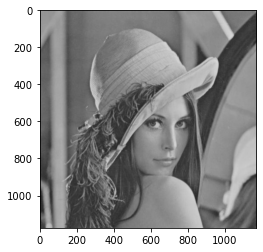

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)

After applying k1


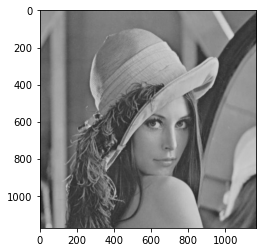

In [14]:
# Write your answer here
print("After applying k1")
ch1 = applyConvolution(im[:,:,0],k1)
im1 = np.zeros([im.shape[0]-2,im.shape[1]-2,3])
# since the image is greyscaled one channel is enough, it just plotted nicer that way
im1[:,:,0] = ch1
im1[:,:,1] = ch1
im1[:,:,2] = ch1
plt.imshow(im1.astype(np.uint8))

After applying k2


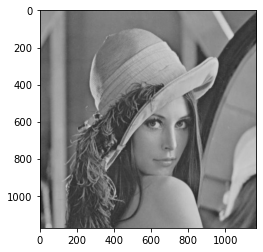

In [15]:
print("After applying k2")
ch1 = applyConvolution(im[:,:,0],k2)
im1 = np.zeros([im.shape[0]-2,im.shape[1]-2,3])
# since the image is greyscaled one channel is enough, it just plotted nicer that way
im1[:,:,0] = ch1
im1[:,:,1] = ch1
im1[:,:,2] = ch1
plt.imshow(im1.astype(np.uint8))

After applying k3


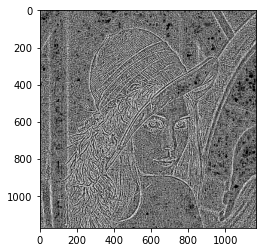

In [16]:
print("After applying k3")
# since the image is greyscaled one channel is enough, it just plotted nicer that way
ch1 = applyConvolution(im[:,:,0],k3)
im1 = np.zeros([im.shape[0]-2,im.shape[1]-2,3])
im1[:,:,0] = ch1
im1[:,:,1] = ch1
im1[:,:,2] = ch1
plt.imshow(im1.astype(np.uint8))

After applying k4


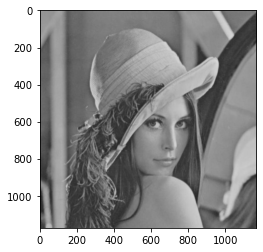

In [17]:
print("After applying k4")
# since the image is greyscaled one channel is enough, it just plotted nicer that way
ch1 = applyConvolution(im[:,:,0],k4)
im1 = np.zeros([im.shape[0]-2,im.shape[1]-2,3])
# since the image is greyscaled one channel is enough, it just plotted nicer that way
im1[:,:,0] = ch1
im1[:,:,1] = ch1
im1[:,:,2] = ch1
plt.imshow(im1.astype(np.uint8))

## Following Week 3
**(Note: We'll learn the material needed to complete this section on Week 3)**

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

**Answer:**
1. input dimensions - kernel dimensions +1
2. (input dimensions - kernel dimensions)/2 +1
3. (input dimensions - kernel dimensions +2)/1 +1
4. (input dimensions - kernel dimensions +2)/2 +1

for 128x128x3 image and 3x3 kernel:
1. (128-3+0)/1+1 = 126x126x3
2. floor((128-3+0)/2+1) = 63x63x3
3. (128-3+2)/1+1 = 128x128x3
4. floor((128-3+2)/2+1) = 64x64x3

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

**FORMULA:**

**output dimensions = floor((input dimensions − kernal size + 2*padding)/stride)+1)**

In [18]:
def outDimSize(dimension, kernel, padding, stride):
    size = ((dimension - kernel + 2 * padding) / stride ) + 1
    return int(size)

W = 1170
K = 3
P = 0
S = 2
print(f"Checking, output size for dimension={W}, kernel={K}, padding={P}, stride={S}: {outDimSize(W, K, P, S)}")

Checking, output size for dimension=1170, kernel=3, padding=0, stride=2: 584


### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


Input shape: (N,28,28,1) (images are greyscale so have only 1 channel, N is the number of samples)

Where not specified: assuming no padding and stride of 1.

**Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function**

Dimension size: 28 - 5 + 1 = 24

Number of filters: 32

So the output shape is: (N,24,24,32)

Number of paramters: 32 (5 5 + 1) = 832

**Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)**

Dimension size: 24 / 2 = 12

Number of filters: 32

So the output shape is: (N,12,12,32)

Number of paramters: 0

**Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function**

Dimension size: (12 - 5) + 1 = 8

Number of filters: 64

So the output shape is: (N,8,8,64)

Number of paramters: 64 (32 5 * 5 + 1) = 51,264

**Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2**

Dimension size: 8 / 2 = 4

Number of filters: 64

So the output shape is: (N,4,4,64)

Number of paramters: 0

**Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)**

Number of neurons: 1024

So the output shape is: (N,1024)

Number of paramters: 1024 * (1024 + 1) = 1,049,600

**Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9)**

Number of neurons: 10

So the output shape is: (N,10)

Number of paramters: 10 * (1024 + 1) = 10,250

###### Calculated param numbers by:

Conv layer: param_number = output_channel_number (input_channel_number kernel_height * kernel_width + 1)

Dense layer: param_number = output_channel_number * (input_channel_number + 1)